# Praktikum 3 — Seleksi Fitur (Titanic Dataset)
Pada tahap ini, kita akan melakukan seleksi fitur pada dataset menggunakan pendekatan analisis korelasi dan relevansi fitur terhadap variabel target (Survived).

In [1]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load Dataset

In [5]:
dpath = 'Titanic-Dataset-fixed.csv'
df = pd.read_csv(dpath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,DECK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,DECK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,DECK,S


## 2. Cek informasi dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3. Cek nilai null

In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

## 4. Pilih variabel yang dapat digunakan sebagai fitur

In [8]:
# Menghapus kolom yang tidak relevan
df_clean = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## 5. Mengubah kolom kategori menjadi numerik

In [9]:
df_clean = pd.get_dummies(df_clean, columns=['Sex', 'Embarked'], drop_first=True)
df_clean.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


## 6. Analisis Korelasi antar Fitur

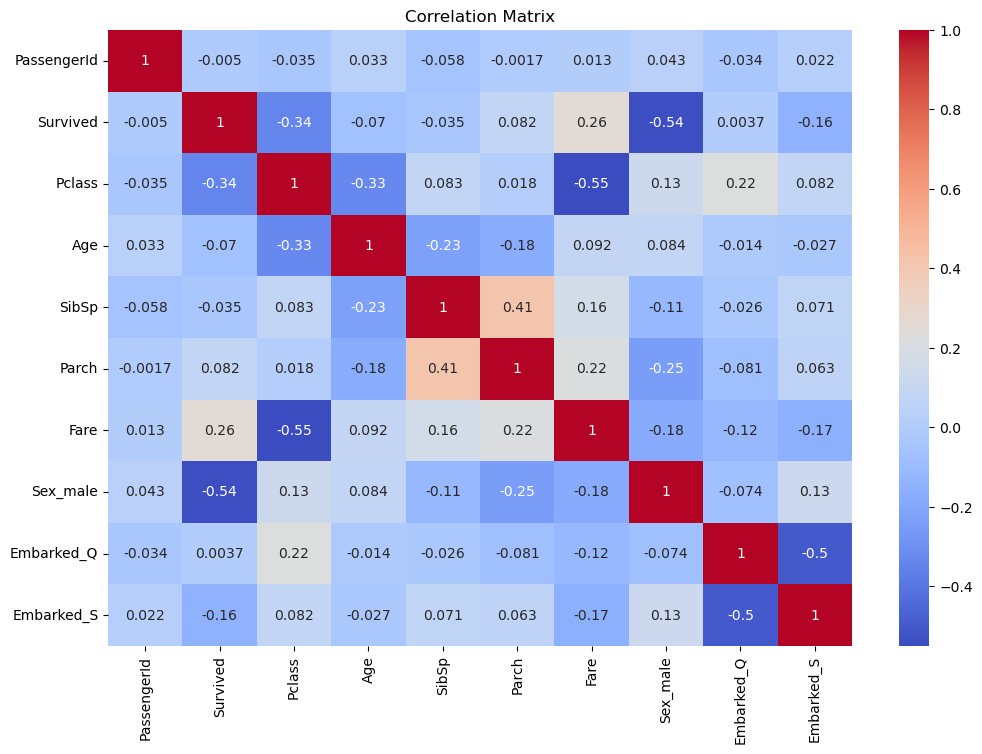

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 7. Pisahkan fitur dan label

In [11]:
X = df_clean.drop('Survived', axis=1)
y = df_clean['Survived']
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


## 8. Normalisasi data (Standard Scaling)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-1.73010796,  0.82737724, -0.5924806 ,  0.43279337, -0.47367361,
        -0.50244517,  0.73769513, -0.30756234,  0.61930636],
       [-1.72622007, -1.56610693,  0.63878901,  0.43279337, -0.47367361,
         0.78684529, -1.35557354, -0.30756234, -1.61470971],
       [-1.72233219,  0.82737724, -0.2846632 , -0.4745452 , -0.47367361,
        -0.48885426, -1.35557354, -0.30756234,  0.61930636],
       [-1.71844431, -1.56610693,  0.40792596,  0.43279337, -0.47367361,
         0.42073024, -1.35557354, -0.30756234,  0.61930636],
       [-1.71455642,  0.82737724,  0.40792596, -0.4745452 , -0.47367361,
        -0.48633742,  0.73769513, -0.30756234,  0.61930636]])

## 9. Split data untuk pelatihan model

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((712, 9), (179, 9))